## Merge features

Here, we will merge all the features in a dataframe

In [1]:
import catalog
import computations as cp

catalog.display_parameters()

## Load the database

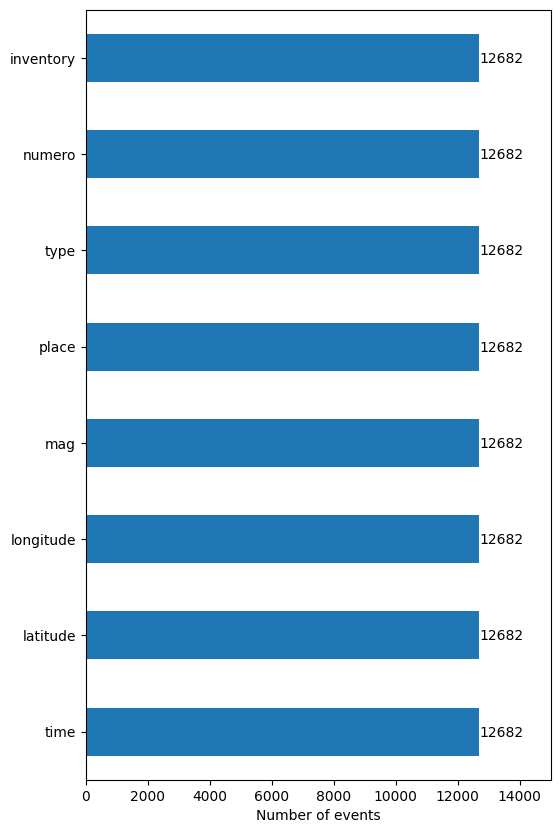

In [2]:
dataframe = catalog.load("data/new_dataframe_with_inventory_cleaned.pickle")

catalog.open_plot(dataframe, pos_number=0.05, xlim=15000)

## Merge the features

In [3]:
fitting_1 = cp.merge_dataframes(dossier = "features/1_spectre", name = "curve_parameters*.csv", area_to_save = 'features/1_dataframe_all_spectre.csv')
energy_2 = cp.merge_dataframes(dossier = "features/2_energy", name = "dataframe_event_*.csv", area_to_save = 'features/2_dataframe_all_energy.csv')

## Rename the event_index column for merge
fitting_1.rename(columns={'Event Index': 'event_index'}, inplace=True)
energy_2.rename(columns={'Event Index': 'event_index'}, inplace=True)

## Merge all features
features_dataframe = fitting_1.merge(energy_2, on='event_index', how='outer')

In [4]:
## Delete events for which a calculation could not be performed in all features
features_dataframe = features_dataframe.dropna()

print("Finally,", len(features_dataframe), "events could be preserved in this study")

## Reset the index and save the dataframe with the features
features_dataframe = features_dataframe.reset_index(drop=True)
features_dataframe.to_pickle("features/all_features.pickle")

Finally, 11541 events could be preserved in this study
